# 1. 卷积原理

① 卷积核不停的在原图上进行滑动，对应元素相乘再相加。

② 下图为每次滑动移动1格，然后再利用原图与卷积核上的数值进行计算得到缩略图矩阵的数据，如下图右所示。

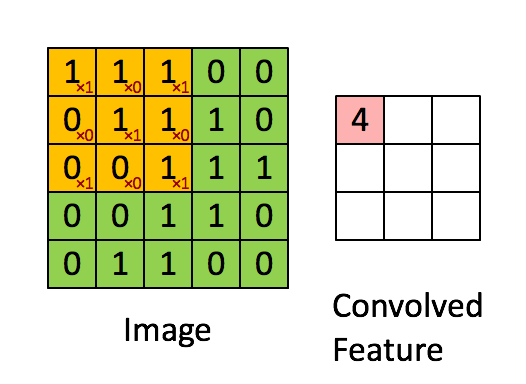

In [1]:
import torch
import torch.nn.functional as F

input = torch.tensor([[1, 2, 0, 3, 1],
                      [0, 1, 2, 3, 1],
                      [1, 2, 1, 0, 0],
                      [5, 2, 3, 1, 1],
                      [2, 1, 0, 1, 1]])

kernel = torch.tensor([[1, 2, 1],
                       [0, 1, 0],
                       [2, 1, 0]])

print(input.shape)
print(kernel.shape)
input = torch.reshape(input, (1,1,5,5))
kernel = torch.reshape(kernel, (1,1,3,3))
print(input.shape)
print(kernel.shape)

output = F.conv2d(input, kernel, stride=1)
print(output)

torch.Size([5, 5])
torch.Size([3, 3])
torch.Size([1, 1, 5, 5])
torch.Size([1, 1, 3, 3])
tensor([[[[10, 12, 12],
          [18, 16, 16],
          [13,  9,  3]]]])


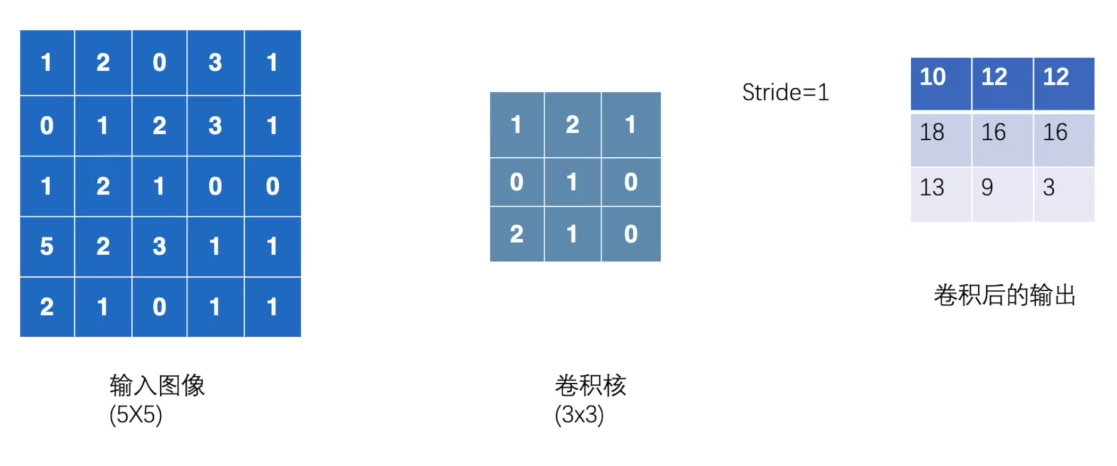

In [2]:
import torch
import torch.nn.functional as F

input = torch.tensor([[1, 2, 0, 3, 1],
                      [0, 1, 2, 3, 1],
                      [1, 2, 1, 0, 0],
                      [5, 2, 3, 1, 1],
                      [2, 1, 0, 1, 1]])

kernel = torch.tensor([[1, 2, 1],
                       [0, 1, 0],
                       [2, 1, 0]])

print(input.shape)
print(kernel.shape)
input = torch.reshape(input, (1,1,5,5))
kernel = torch.reshape(kernel, (1,1,3,3))
print(input.shape)
print(kernel.shape)

output2 = F.conv2d(input, kernel, stride=2)  # 步伐为2
print(output2)

torch.Size([5, 5])
torch.Size([3, 3])
torch.Size([1, 1, 5, 5])
torch.Size([1, 1, 3, 3])
tensor([[[[10, 12],
          [13,  3]]]])


In [3]:
import torch
import torch.nn.functional as F

input = torch.tensor([[1, 2, 0, 3, 1],
                      [0, 1, 2, 3, 1],
                      [1, 2, 1, 0, 0],
                      [5, 2, 3, 1, 1],
                      [2, 1, 0, 1, 1]])

kernel = torch.tensor([[1, 2, 1],
                       [0, 1, 0],
                       [2, 1, 0]])

print(input.shape)
print(kernel.shape)
input = torch.reshape(input, (1,1,5,5))
kernel = torch.reshape(kernel, (1,1,3,3))
print(input.shape)
print(kernel.shape)

output3 = F.conv2d(input, kernel, stride=1, padding=1)  # 周围只填充一层
print(output3)

torch.Size([5, 5])
torch.Size([3, 3])
torch.Size([1, 1, 5, 5])
torch.Size([1, 1, 3, 3])
tensor([[[[ 1,  3,  4, 10,  8],
          [ 5, 10, 12, 12,  6],
          [ 7, 18, 16, 16,  8],
          [11, 13,  9,  3,  4],
          [14, 13,  9,  7,  4]]]])


# 2. 步幅、填充原理

① 步幅：卷积核经过输入特征图的采样间隔。设置步幅的目的：希望减小输入参数的数目，减少计算量。

② 填充：在输入特征图的每一边添加一定数目的行列。设置填充的目的：希望每个输入方块都能作为卷积窗口的中心，或使得输出的特征图的长、宽 = 输入的特征图的长、宽。

③ 一个尺寸 a * a 的特征图，经过 b * b 的卷积层，步幅（stride）= c，填充（padding）= d，若d等于0，也就是不填充，输出的特征图的尺寸 =（a-b）/ c+1；若d不等于0，也就是填充，输出的特征图的尺寸 =（a+2d-b）/ c+1。

例子1：一个特征图尺寸为4 * 4的输入，使用3 * 3的卷积核，步幅=1，填充=0，输出的尺寸=(4 - 3)/1 + 1 = 2。

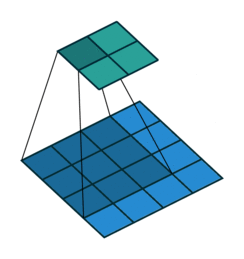

例子2：  一个特征图尺寸为5 * 5的输入，使用3 * 3的卷积核，步幅=1，填充=1，输出的尺寸=(5 + 2 * 1 - 3)/1 + 1 = 5。

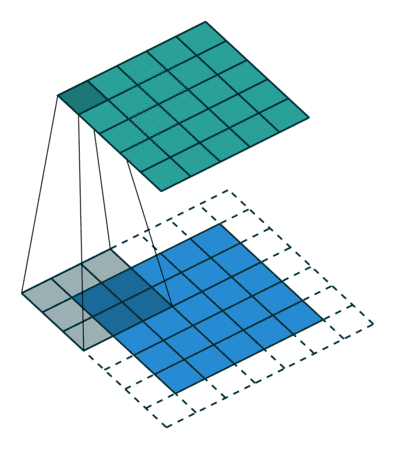

例子3：一个特征图尺寸为5 * 5的输入， 使用3 * 3的卷积核，步幅=2，填充=0，输出的尺寸=(5-3)/2 + 1 = 2。

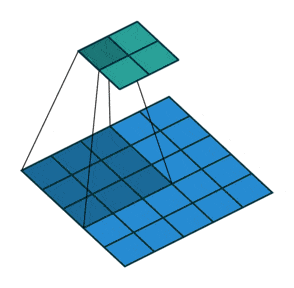

例子4：一个特征图尺寸为6 * 6的输入， 使用3 * 3的卷积核，步幅=2，填充=1，输出的尺寸=(6 + 2 * 1 - 3)/2 + 1 = 2.5 + 1 = 3.5 向下取整=3（降采样：边长减少1/2）。

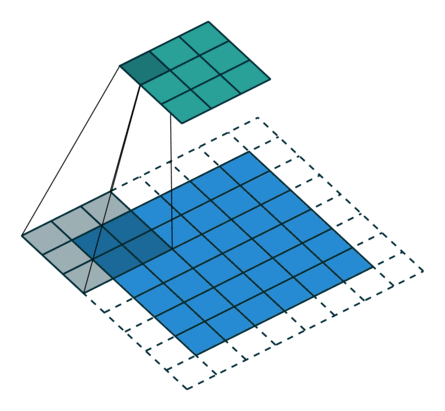